# Beer Data Analysis Report

## Table of Contents

1. Executive Summary
2. Data & Methodology
3. Data Analysis & Results
4. Conclusion
5. Appendix

## 1. Executive Summary

This project conducted a comprehensive analysis of a dataset comprising 1,586,614 customer ratings and 13 different variables for 5,743 beers obtained from Kaggle. The primary objectives were to address several critical questions related to brewery rankings, ratings by year, factors influencing user preferences, and beer recommendations.

**Brewery Rankings:**
The analysis identified the top 3 breweries that produce the strongest beers. These breweries were found to be Schorschbräu, BrewDog, and De Struise Brouwers, based on the data.

**Year of Highest Ratings:**
Through meticulous examination, the year with the highest ratings for beers was identified as 2010, with a total of 17,757 five-star ratings. This insight provides valuable historical context.

**Factors Influencing User Preferences:**
To ascertain the factors influencing user preferences among taste, aroma, appearance, and palate, a linear regression model and visualizations were employed. The findings revealed that customers prioritize taste over other factors, shedding light on the key driver of user satisfaction.

**Beer Recommendations:**
Drawing from the analysis, three beer recommendations were made for sharing with friends. Rauch Ür Bock, Caldera Pale Ale, and Old Growth Imperial Stout, all produced by Caldera Brewing Company, were suggested. These selections were made based on high taste and overall ratings, as well as their relatively low alcohol by volume content, making them appealing choices for various tastes.

The project's thorough data preparation, insightful visualizations, and robust analysis provide valuable insights into the world of beer preferences and brewery rankings. The identified top breweries, peak rating year, and factors influencing user satisfaction contribute to a comprehensive understanding of the dataset. Additionally, the beer recommendations offer practical suggestions for enthusiasts seeking enjoyable options with diverse palates.

## 2. Data & Methodology

### 2.1 About the Data

The data was from [kaggle.com](https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate). The data contains 1.5 million beer reviews from Beer Advocate. It includes ratings on appearance, aroma, palate, taste, and overall impression. Reviews also include product and user information.

The data has the following columns:

* `beer_ABV` - alcohol by volume
* `beer_beerId` - beer ID
* `beer_brewerId` - beer brewer ID
* `beer_name` - beer name
* `beer_style` - beer style
* `review_appearance` - review on the beer's appearance
* `review_palette` - review on the beer's palette (colours)
* `review_overall` - overall beer review
* `review_taste` - review on the beer's taste
* `review_profileName` - profile name of the reviewer
* `review_aroma` - review on the beer's aroma
* `review_time` - timestamp when the review was made

In [1]:
# Import libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
beer_reviews = pd.read_csv('data/beer_reviews.csv')

# Preview the data
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
# Dataframe size
beer_reviews.shape

(1586614, 13)

In [7]:
# Data Information
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


### 2.2 Data Preparation

In [3]:
# Converting timestamp of review time to datetime
beer_reviews['review_date'] = beer_reviews['review_time'].apply(lambda x: datetime.fromtimestamp(x))

# Check the data type
beer_reviews['review_date'].dtype

dtype('<M8[ns]')

In [4]:
# Review Year Month column
beer_reviews['review_year_month'] = beer_reviews['review_date'].dt.to_period('M')

In [5]:
# Review Year column
beer_reviews['review_year'] = beer_reviews['review_date'].dt.year

In [6]:
# Preview the dataset
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_date,review_year_month,review_year
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,2009-02-16 13:57:03,2009-02,2009
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2009-03-01 06:44:57,2009-03,2009
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2009-03-01 07:10:04,2009-03,2009
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2009-02-15 12:12:25,2009-02,2009
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2010-12-30 11:53:26,2010-12,2010


<h2>3. Data Analysis</h2>

<h3>3.1 Rank the top 3 breweries which produce the strongest beers</h3>



In [7]:
top_breweries_abv = beer_reviews.groupby('brewery_name')[['beer_abv']].max().reset_index().sort_values('beer_abv', ascending=False).head()

top_breweries_abv

,brewery_name,beer_abv
4667,Schorschbräu,57.7
1182,BrewDog,41.0
1897,De Struise Brouwers,39.0
2544,Hair of the Dog Brewing Company / Brewery and ...,29.0
701,Boston Beer Company (Samuel Adams),27.0


In [8]:
# Initialize the list
strongest_beers = []

# Loop over the top breweries names
for brewery_name in top_breweries_abv.brewery_name:
    # 
    brewery_data = beer_reviews.loc[beer_reviews['brewery_name'] == brewery_name, ['brewery_name', 'beer_name', 'beer_abv']].sort_values('beer_abv', ascending=False).drop_duplicates().head(1)
    # Append the data
    strongest_beers.append(brewery_data)

# Create the DataFrame for the top breweries and beers
top_breweries_beer_abv = pd.concat(strongest_beers, axis=0)

# Preview the data
top_breweries_beer_abv

,brewery_name,beer_name,beer_abv
12919,Schorschbräu,Schorschbräu Schorschbock 57%,57.7
746395,BrewDog,Sink The Bismarck!,41.0
996154,De Struise Brouwers,Black Damnation VI - Messy,39.0
1042320,Hair of the Dog Brewing Company / Brewery and ...,Dave,29.0
293907,Boston Beer Company (Samuel Adams),Samuel Adams Utopias,27.0


**y labeling**: we should have the y label name first in bold, and the beer names in parentheses

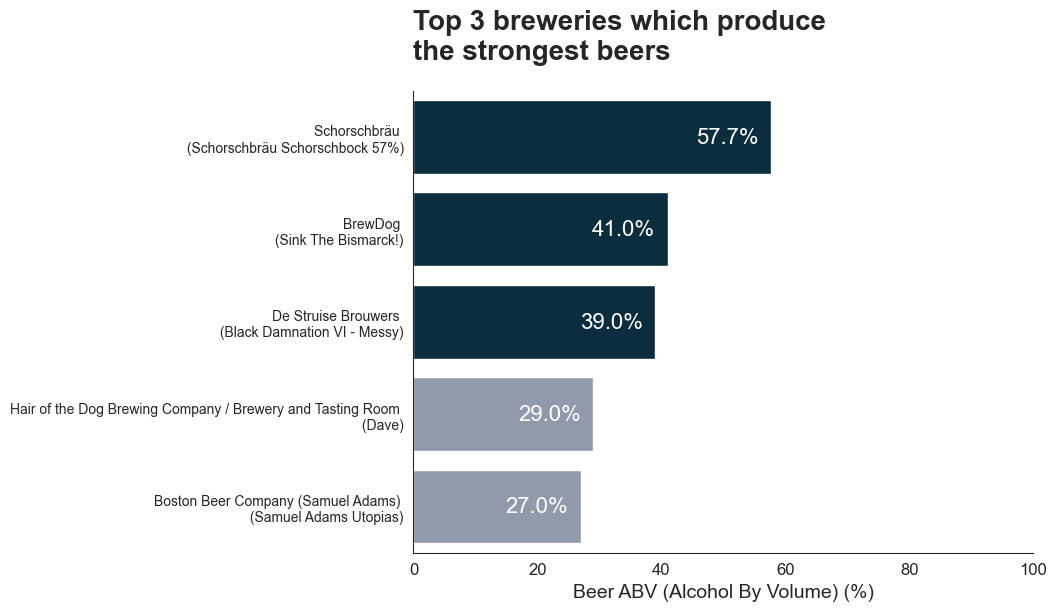

In [46]:
sns.set_style('white')
sns.set_palette(['#023047', '#023047', '#023047', '#8d99ae', '#8d99ae'])

fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(top_breweries_beer_abv, x='beer_abv', y='brewery_name')
sns.despine()
ax.set_title('Top 3 breweries which produce \nthe strongest beers', 
             loc='left', y=1.05, fontsize=20, weight='bold')
# Label the y-axis
y_labels = [f'{x} \n ({y})' for x, y in zip(top_breweries_beer_abv['brewery_name'],
                                     top_breweries_beer_abv['beer_name'])]
ax.set_yticklabels(y_labels)
plt.xlim([0, 100])

# Labeling the bars
for i in range(len(top_breweries_beer_abv.brewery_name)):
    plt.text(list(top_breweries_beer_abv.beer_abv)[i]-2, i, "{}%".format(list(top_breweries_beer_abv.beer_abv)[i]),
             ha='right', va='center', fontsize=16, color='white')

plt.ylabel('')
plt.xlabel('Beer ABV (Alcohol By Volume) (%)', fontsize=14)
plt.xticks(fontsize=12)

plt.show()

<h3>3.2 Which year did beers enjoy the highest ratings?</h3>

We are going to group the data by year and count the number of five stars each year

In [9]:
# Filter the data to only include the 5 stars
beer_5_star_rating = beer_reviews.loc[beer_reviews['review_overall'] == 5.0]

# Group the data by year
beer_5_star_rating_by_year = beer_5_star_rating.groupby('review_year')[['review_overall']].agg('count').reset_index()

# Show the data
beer_5_star_rating_by_year

,review_year,review_overall
0,1998,3
1,1999,2
2,2000,17
3,2001,506
4,2002,1672
5,2003,3019
6,2004,4042
7,2005,5589
8,2006,7762
9,2007,8556


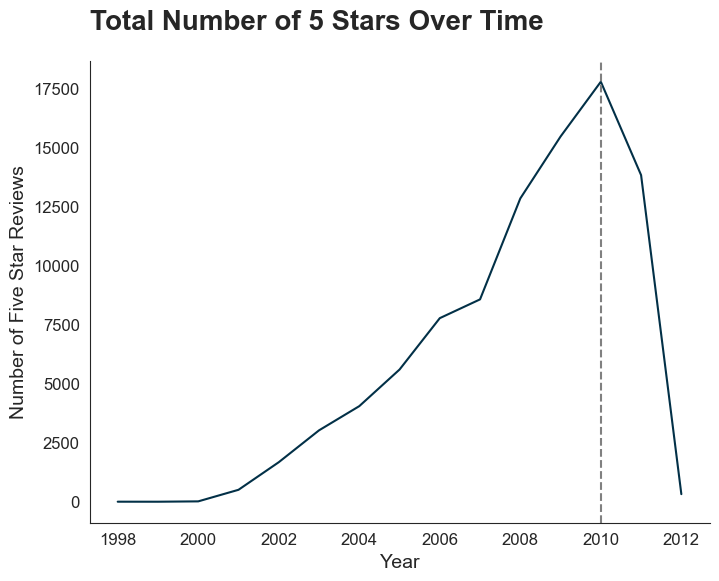

In [47]:
sns.set_style('white')
sns.set_palette(['#023047'])

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(beer_5_star_rating_by_year, x='review_year', y='review_overall')
sns.despine()
ax.set_title('Total Number of 5 Stars Over Time',
             loc='left', fontsize=20, y=1.05, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Five Star Reviews', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=2010, linewidth=1.5, linestyle='--', color='gray')

plt.show()

<h3>3.3 Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?</h3>

we will do a regression analysis to figure out which factor influences the most the overall rating

In [18]:
beer_reviews.loc[beer_reviews['review_overall'] == 5.0].head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_date,review_year_month,review_year
11,1075,Caldera Brewing Company,1283154365,5.0,5.0,4.0,MadeInOregon,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,2010-08-30 01:46:05,2010-08,2010
25,1075,Caldera Brewing Company,1318802642,5.0,5.0,3.5,optimator13,Rauchbier,3.5,5.0,Rauch Ür Bock,7.4,58046,2011-10-16 16:04:02,2011-10,2011
31,1075,Caldera Brewing Company,1315014054,5.0,4.5,4.0,Bung,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046,2011-09-02 19:40:54,2011-09,2011
42,1075,Caldera Brewing Company,1305926255,5.0,4.5,3.5,Deuane,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046,2011-05-20 15:17:35,2011-05,2011
73,1075,Caldera Brewing Company,1246913078,5.0,4.0,4.5,GratefulBeerGuy,American Pale Ale (APA),4.5,4.0,Caldera Pale Ale,5.5,25414,2009-07-06 14:44:38,2009-07,2009


In [19]:
import statsmodels.api as sm

In [26]:
X = beer_reviews[['review_aroma', 'review_appearance', 'review_taste', 'review_palate']]
y = beer_reviews['review_overall']

In [28]:
X_sm = sm.add_constant(X)

In [29]:
res = sm.OLS(y, X_sm).fit()

In [30]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                 7.636e+05
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:26:25   Log-Likelihood:            -8.7999e+05
No. Observations:             1586614   AIC:                         1.760e+06
Df Residuals:                 1586609   BIC:                         1.760e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4396      0.00

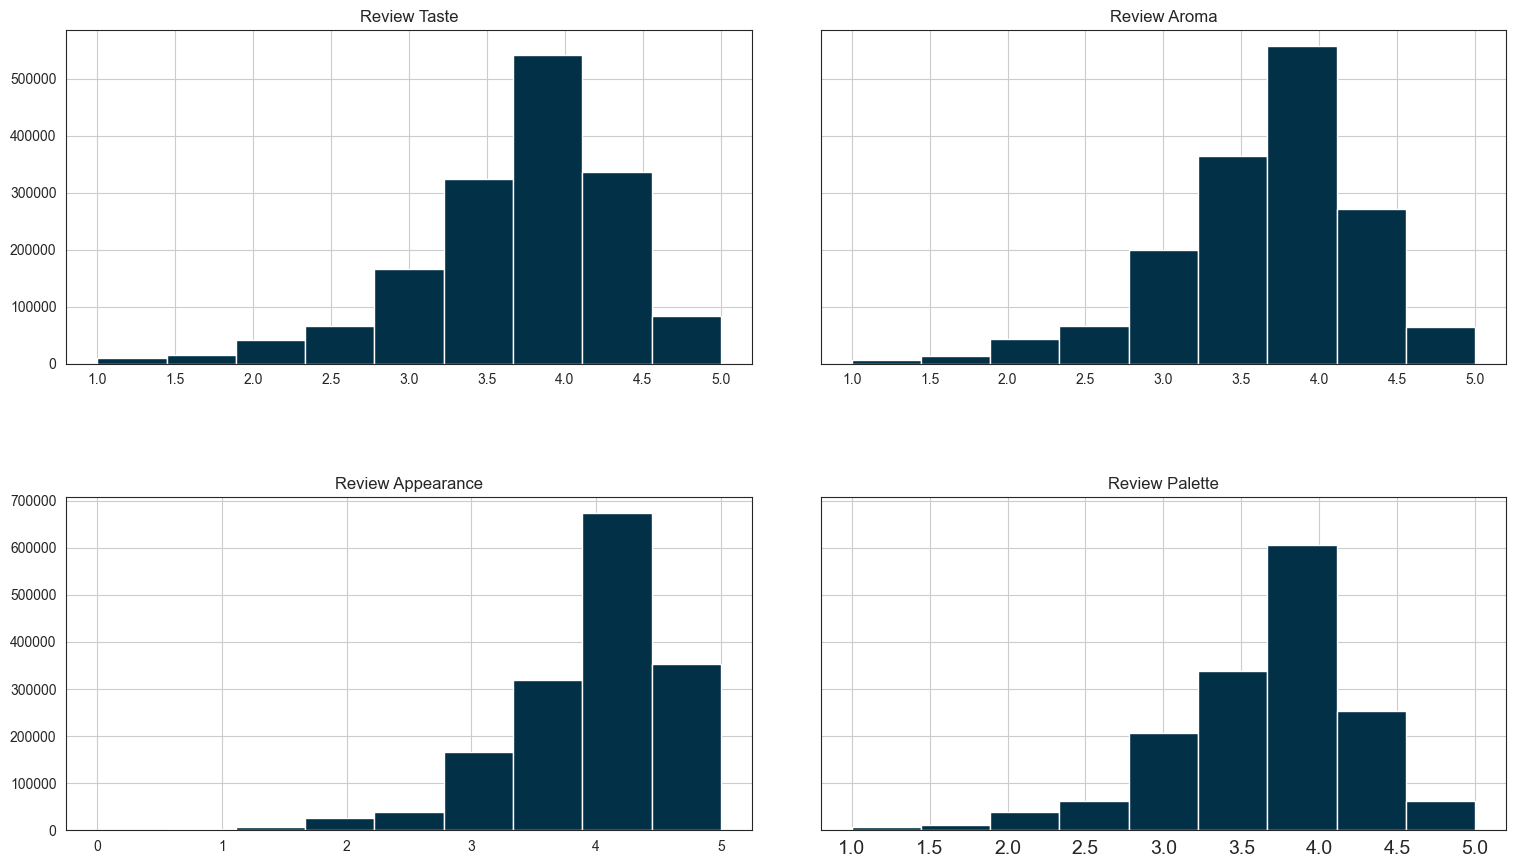

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10), sharey='row')

beer_reviews.review_taste.hist(ax=ax[0, 0], bins=9)
beer_reviews.review_aroma.hist(ax=ax[0, 1], bins=9)
beer_reviews.review_appearance.hist(ax=ax[1, 0], bins=9)
beer_reviews.review_palate.hist(ax=ax[1, 1], bins=9)

# Plot 1 - Review Taste
ax[0, 0].set_title('Review Taste')

# Plot 2
ax[0, 1].set_title('Review Aroma')

# Plot 3
ax[1, 0].set_title('Review Appearance')

# Plot 4
ax[1, 1].set_title('Review Palette')

plt.xticks(fontsize=14)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.4)

plt.show()

<h3>3.4 If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?</h3>

In [31]:
beer_reviews.loc[(beer_reviews['review_taste'] == 5) & (beer_reviews['review_overall'] == 5)]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_date,review_year_month,review_year
25,1075,Caldera Brewing Company,1318802642,5.0,5.0,3.5,optimator13,Rauchbier,3.5,5.0,Rauch Ür Bock,7.4,58046,2011-10-16 16:04:02,2011-10,2011
31,1075,Caldera Brewing Company,1315014054,5.0,4.5,4.0,Bung,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046,2011-09-02 19:40:54,2011-09,2011
42,1075,Caldera Brewing Company,1305926255,5.0,4.5,3.5,Deuane,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046,2011-05-20 15:17:35,2011-05,2011
87,1075,Caldera Brewing Company,1235940573,5.0,3.5,4.0,mtrentm,American Pale Ale (APA),4.0,5.0,Caldera Pale Ale,5.5,25414,2009-03-01 13:49:33,2009-03,2009
190,1075,Caldera Brewing Company,1258511938,5.0,5.0,3.0,cjever19,American Pale Ale (APA),5.0,5.0,Caldera Pale Ale,5.5,25414,2009-11-17 19:38:58,2009-11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586086,1854,Hereford & Hops Restaurant & Brewpub,1187153152,5.0,4.5,4.5,ZAP,Dortmunder / Export Lager,4.5,5.0,Dortmunder Lager,NaN,38066,2007-08-14 22:45:52,2007-08,2007
1586116,16342,Coldstream Brewery,1243767822,5.0,4.5,4.0,hogshead,English Bitter,4.5,5.0,Coldstream Bitter,4.8,44682,2009-05-31 05:03:42,2009-05,2009
1586400,14359,The Defiant Brewing Company,1163136541,5.0,4.5,4.5,maddogruss,English Pale Ale,4.5,5.0,Little Thumper Ale,5.0,33647,2006-11-09 22:29:01,2006-11,2006
1586605,14359,The Defiant Brewing Company,1163291143,5.0,5.0,5.0,NyackNicky,Pumpkin Ale,5.0,5.0,The Horseman's Ale,5.2,33061,2006-11-11 17:25:43,2006-11,2006
